In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/zhann/OneDrive/Рабочий стол/Аналитика данных/Статистика/Курсовой/Dataset_AB_TEST.csv', sep = ';')


In [3]:
df.head()

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10976 non-null  int64  
 1   id_group    10902 non-null  object 
 2   sum_pay     10849 non-null  float64
 3   id_point    10895 non-null  float64
 4   months_reg  10976 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 428.9+ KB


In [5]:
df.dropna(inplace=True) #удаляем все строки с нулевыми значениями, в любых столбцах

In [ ]:
#df['id_point'].isnull().sum() / df['id_point'].count() #считаем процент нулевых значений для id_point

#% нулевых в id_point очень низкий, можно их удалить

In [ ]:
#df.dropna(subset='id_point', inplace=True)

In [ ]:
#df.info()

<AxesSubplot:>

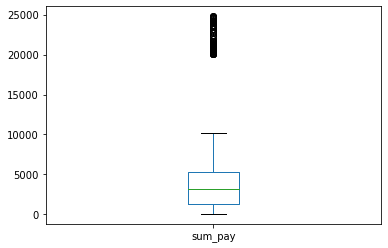

In [6]:
df.boxplot(column = 'sum_pay', grid = False) #смотрим есть ли выбросы

<AxesSubplot:xlabel='sum_pay', ylabel='Count'>

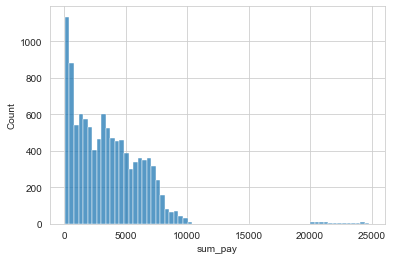

In [75]:
sns.histplot(df['sum_pay'])

Боксплот и гистограмма показывают, что есть выбросы

In [8]:
def statistical_analysis(x,q = [.1,.25,.3,.4,.5,.6,.75,.9]):
    mean_x=x.mean()    #определяем среднее
    var_x=x.var()      #определяем дисперсию
    std_x=x.std()      #определяем стандартное отклонение
    #создаем dataframe по квантилям
    qs = np.quantile(x,q)
    qsr = qs[1:]/qs[:-1]
    v=0.0
    qsr = np.insert(qsr, 0, v)
    dfq = pd.DataFrame(q, columns=['уровень квантиля']) 
    dfq['quantile'] = qs
    dfq['ratio'] = qsr
    nq = np.quantile(x,.25)
    vq = np.quantile(x,.75)
    sns.histplot(data=x),      #гистограмма
    print('Среднее равно', mean_x),   
    print('Дисперсия равна', var_x),
    print('Стандартное отклонение равно', std_x),
    print(dfq)
    print('Межквартильный размах: ',(vq-nq))

In [9]:
df['id_group'].unique() #проверяем, чтобы не было странных значений

array(['test', 'control'], dtype=object)

In [10]:
df['id_point'].unique() #проверяем, чтобы не было странных значений

array([1199., 1182., 1178., 1179., 1186., 1188.])

Среднее равно 3426.4141169906075
Дисперсия равна 5995231.120808876
Стандартное отклонение равно 2448.516105891255
    уровень квантиля  quantile     ratio
0              0.250   1235.00  0.000000
1              0.500   3153.00  2.553036
2              0.750   5267.00  1.670473
3              0.800   5876.60  1.115740
4              0.900   6994.80  1.190280
5              0.910   7124.96  1.018608
6              0.920   7229.68  1.014698
7              0.930   7369.36  1.019320
8              0.940   7494.28  1.016951
9              0.950   7669.40  1.023367
10             0.960   7851.92  1.023798
11             0.970   8079.44  1.028976
12             0.980   8548.44  1.058049
13             0.990   9146.96  1.070015
14             0.992   9242.92  1.010491
15             0.995   9508.04  1.028684
16             1.000  10056.00  1.057631
Межквартильный размах:  4032.0


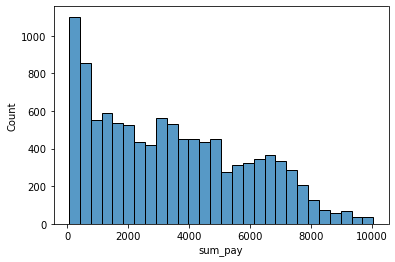

In [50]:
statistical_analysis(df_vyb['sum_pay'], q = [.25, .5, .75, .8, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99, .992, .995, 1])

Видим, что выбросы находятся за 99,3 квантилем. Уберем их

In [49]:
df_vyb = df.loc[df['sum_pay'] < np.quantile(df['sum_pay'],.992)]

In [51]:
df_test_vyb = df_vyb.loc[df_vyb['id_group'] == 'test']

In [52]:
df_control_vyb = df_vyb.loc[df_vyb['id_group'] == 'control']

In [53]:
#не нужно заполнять средними, просто удалили нули выше
#df_test['sum_pay'].fillna((df_test['sum_pay'].mean()), inplace = True)

In [54]:
#не нужно заполнять средними, просто удалили нули выше
#df_control['sum_pay'].fillna((df_control['sum_pay'].mean()), inplace = True)

In [55]:
#statistical_analysis(df_test['sum_pay'], q = [.25, .5, .75, .8, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99, 1]) 

In [56]:
#выбросы убрали из первоначального датафрейма
#df_test_vyb = df_test.loc[df_test['sum_pay'] < np.quantile(df_test['sum_pay'],.99)]

In [57]:
from scipy.stats import ttest_ind
from statsmodels.stats.power import tt_ind_solve_power
import scipy.stats as stats

In [58]:
def mann_whitney_func(x1, x2, alpha=0.05):
    s, p_mw = stats.mannwhitneyu(x1, x2, alternative = 'greater') #возьмем альтернативную гипотезу об увеличении
    if p_mw < alpha:
        print('По Манну-Уитни распределения не равны')
    else:
        print('По Манну-Уитни распределения равны')
        print(f's = {s}, p_mw = {p_mw}')
    return s, p_mw

In [59]:
def t_test(df1,df2,alpha=0.05):
    s,p = ttest_ind(df1,df2, alternative = 'two-sided')
    print('t-критерий = ',s)
    print('p-value = ',p)
    print('среднее группы test = ', df1.mean())
    print('среднее группы control = ', df2.mean())
    nobs = tt_ind_solve_power(effect_size=df['sum_pay'].mean()/df['sum_pay'].std(), 
                                   alpha=alpha, alternative='two-sided',
                                  power = 0.8)
    sns.histplot(df1, color = 'b')
    sns.histplot(df2, color = 'r')
    plt.show()
    if p>alpha:
        print('Нулевая гипотеза о равенстве средних принимается')
    else:
        print('Нулевая гипотеза о равенстве средних не принимается')
    mann_whitney_func(df1,df2)
    print('минимальный размер выборки = ', 2*nobs)

t-критерий =  3.5228128383423614
p-value =  0.0004287648845005441
среднее группы test =  3505.971672902191
среднее группы control =  3339.535408560311


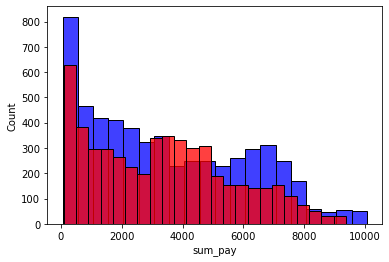

Нулевая гипотеза о равенстве средних не принимается
По Манну-Уитни распределения не равны
минимальный размер выборки =  23.210285955529216


In [60]:
t_test(df_test_vyb['sum_pay'], df_control_vyb['sum_pay'])

In [61]:
point_list_t = df_test_vyb['id_point'].unique().tolist()
point_list_t

[1199.0, 1179.0, 1178.0, 1182.0, 1186.0, 1188.0]

In [62]:
point_list_c = df_control_vyb['id_point'].unique().tolist()
point_list_c

[1182.0, 1178.0, 1179.0, 1186.0, 1188.0]

в контрольной группе отсутствуют данные для точки 1199. Исключим ее.

In [63]:
months_reg_list = df['months_reg'].unique().tolist()
months_reg_list

[8, 11, 2, 3, 14, 5, 1, 0, 9, 12, 4, 6, 10, 7, 13]

In [64]:
df_control_vyb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5140 entries, 1 to 10972
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   5140 non-null   int64  
 1   id_group    5140 non-null   object 
 2   sum_pay     5140 non-null   float64
 3   id_point    5140 non-null   float64
 4   months_reg  5140 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 240.9+ KB


In [65]:
def point_an(point):
    df_control_vyb_a = df_control_vyb.loc[df_control_vyb['id_point'] == point]
    df_test_vyb_a = df_test_vyb.loc[df_test_vyb['id_point'] == point]
    print(f'Результат для торговой точки "{int(point)}"')
    t_test(df_test_vyb_a['sum_pay'], df_control_vyb_a['sum_pay'])
    print(f'размер выборки: {min(len(df_control_vyb_a),len(df_test_vyb_a))}')
    print('___________')
    return

Результат для торговой точки "1182"
t-критерий =  6.845685685742843
p-value =  1.0157411205500944e-11
среднее группы test =  4901.322717622081
среднее группы control =  4036.9426877470355


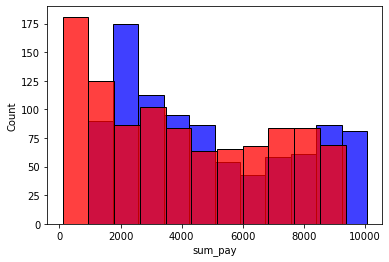

Нулевая гипотеза о равенстве средних не принимается
По Манну-Уитни распределения не равны
минимальный размер выборки =  23.210285955529216
размер выборки: 942
___________
Результат для торговой точки "1178"
t-критерий =  -1.5338932633911708
p-value =  0.1251217226713009
среднее группы test =  2936.386949293433
среднее группы control =  3036.214731585518


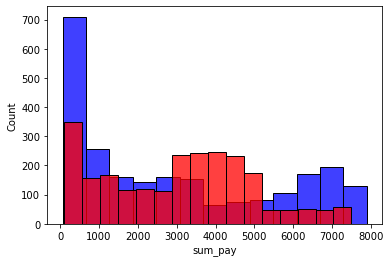

Нулевая гипотеза о равенстве средних принимается
По Манну-Уитни распределения равны
s = 2659280.5, p_mw = 0.9999992434121152
минимальный размер выборки =  23.210285955529216
размер выборки: 2403
___________
Результат для торговой точки "1179"
t-критерий =  1.1225576641441302
p-value =  0.2617037465196552
среднее группы test =  3421.826934097421
среднее группы control =  3331.3105480259283


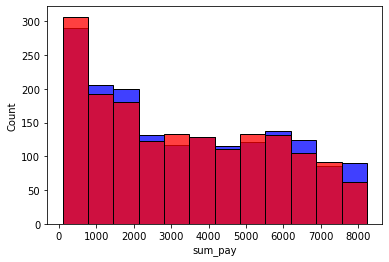

Нулевая гипотеза о равенстве средних принимается
По Манну-Уитни распределения равны
s = 1513598.5, p_mw = 0.1290381925907893
минимальный размер выборки =  23.210285955529216
размер выборки: 1697
___________
Результат для торговой точки "1186"
t-критерий =  -1.3502123367588006
p-value =  0.181936501831722
среднее группы test =  3638.4
среднее группы control =  4546.0


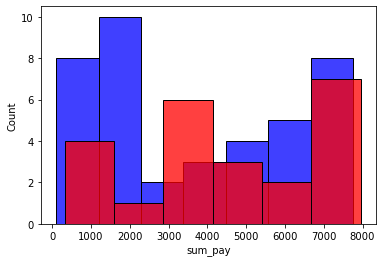

Нулевая гипотеза о равенстве средних принимается
По Манну-Уитни распределения равны
s = 367.0, p_mw = 0.9090301674857206
минимальный размер выборки =  23.210285955529216
размер выборки: 23
___________
Результат для торговой точки "1188"
t-критерий =  -0.13596158621984006
p-value =  0.8956790614998074
среднее группы test =  4946.0
среднее группы control =  5202.0


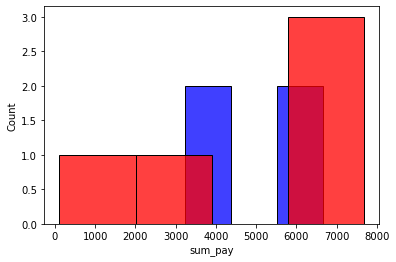

Нулевая гипотеза о равенстве средних принимается
По Манну-Уитни распределения равны
s = 8.0, p_mw = 0.7222222222222223
минимальный размер выборки =  23.210285955529216
размер выборки: 4
___________


In [66]:
for i in point_list_c:
    point_an(i)
    

Для торговой точки 1186 размер выбрки  находится на границе допустимого, а для торговой точки 1188 значительно меньше. Для этих точек рекомендую набрать большее количество наблюдений. Для торговой точки 1199 вообще отсутствовали наблюдения в контрольной группе.

In [68]:
def proxi_ranges(x1, x2, alpha = 0.05):
    c = np.cov(x1, x2, rowvar = False)
    print('Дисперсия ряда 1 равна ', c[0,0])
    print('Дисперсия ряда 2 равна ', c[1,1])
    print('Ковариация рядов равна ', c[0,1])
    r, p_pearson = stats.pearsonr(x1, x2)
    cor, p_spearman = stats.spearmanr(x1, x2)
    plt.figure(figsize=(8,5))
    sns.set_style('whitegrid')
    sns.scatterplot(x = x1, y = x2)
    plt.show()
    if p_pearson > alpha:
        print('Корреляция по Пирсону равна нулю')
    elif abs(r) < 0.3:
        print(f'Корреляция по Пирсону слабая r = {r}')
    elif abs(r) <= 0.7:
        print(f'Корреляция по Пирсону средняя r = {r}')
    else:
        print(f'Корреляция по Пирсону сильная r = {r}')
    if p_spearman > alpha:
        print(f'Корреляция по Спирману равна нулю')
    elif abs(cor) < 0.3:
        print(f'Корреляция по Спирману слабая cor = {cor}')
    elif abs(cor) <= 0.7:
        print(f'Корреляция по Спирману средняя cor = {cor}')
    else:
        print(f'Корреляция по Спирману сильная cor = {cor}')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10840 non-null  int64  
 1   id_group    10840 non-null  object 
 2   sum_pay     10840 non-null  float64
 3   id_point    10840 non-null  float64
 4   months_reg  10840 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 508.1+ KB


Дисперсия ряда 1 равна  10.039879738018866
Дисперсия ряда 2 равна  5995231.120808881
Ковариация рядов равна  4648.314459482239


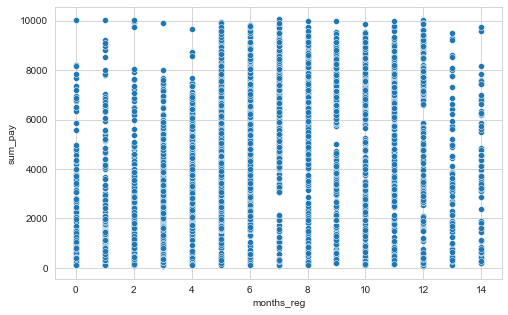

Корреляция по Пирсону средняя r = 0.599139951713382
Корреляция по Спирману средняя cor = 0.6522561198012273


In [76]:
proxi_ranges(df_vyb['months_reg'], df_vyb['sum_pay'])


Дисперсия ряда 1 равна  10.351220419352822
Дисперсия ряда 2 равна  6662097.886403418
Ковариация рядов равна  5089.67201295765


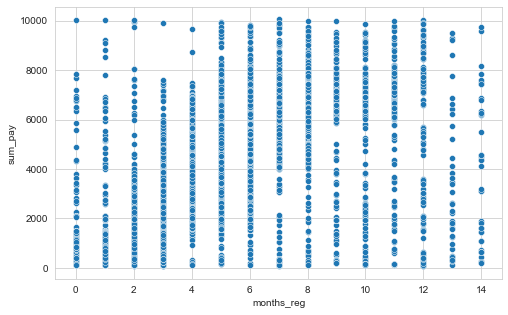

Корреляция по Пирсону средняя r = 0.6128984365875689
Корреляция по Спирману средняя cor = 0.6625312722807328


In [71]:
proxi_ranges(df_test_vyb['months_reg'], df_test_vyb['sum_pay'])

Дисперсия ряда 1 равна  9.699852694319674
Дисперсия ряда 2 равна  5253689.135348443
Ковариация рядов равна  4161.8818812120335


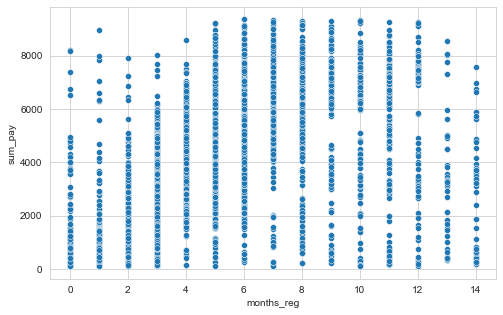

Корреляция по Пирсону средняя r = 0.5830086454559587
Корреляция по Спирману средняя cor = 0.6385804587227423


In [73]:
proxi_ranges(df_control_vyb['months_reg'], df_control_vyb['sum_pay'])

Понимаем, что присутствует средняя коррелляция между тем как давно пользователь зарегистрирован и тем сколько он тратит как в целом так и а обеих группах (тестовой и контрольной). Это надо учесть при планировании А/В теста.